### Load the data

In [18]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier

from sklearn.tree import plot_tree

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score, f1_score

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('churn.csv')
df.head()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,...,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,no,no,yes,...,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,no,no,yes,...,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,no,no,no,...,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,no,yes,no,...,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,no,yes,no,...,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


### Actual dataset source: https://learn.datacamp.com/courses/marketing-analytics-predicting-customer-churn-in-python

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account_Length  3333 non-null   int64  
 1   Vmail_Message   3333 non-null   int64  
 2   Day_Mins        3333 non-null   float64
 3   Eve_Mins        3333 non-null   float64
 4   Night_Mins      3333 non-null   float64
 5   Intl_Mins       3333 non-null   float64
 6   CustServ_Calls  3333 non-null   int64  
 7   Churn           3333 non-null   object 
 8   Intl_Plan       3333 non-null   object 
 9   Vmail_Plan      3333 non-null   object 
 10  Day_Calls       3333 non-null   int64  
 11  Day_Charge      3333 non-null   float64
 12  Eve_Calls       3333 non-null   int64  
 13  Eve_Charge      3333 non-null   float64
 14  Night_Calls     3333 non-null   int64  
 15  Night_Charge    3333 non-null   float64
 16  Intl_Calls      3333 non-null   int64  
 17  Intl_Charge     3333 non-null   f

In [4]:
# df.describe().columns
# df.columns
# df.shape

In [5]:
print(df['Churn'].unique())
print(df['Intl_Plan'].unique())
print(df['Vmail_Plan'].unique())

['no' 'yes']
['no' 'yes']
['yes' 'no']


In [6]:
# df['State'].value_counts()

### Data Preprocessing

In [7]:
df = df.drop(['State','Area_Code','Phone'], axis = 1)

df['Churn'] = df['Churn'].replace({'no':0, 'yes':1})
df['Intl_Plan'] = df['Intl_Plan'].replace({'no':0, 'yes':1})
df['Vmail_Plan'] = df['Vmail_Plan'].replace({'no':0, 'yes':1})

In [8]:
df.sample(3, random_state = 13)

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge
871,98,0,271.4,190.4,284.7,11.1,4,1,0,0,119,46.14,102,16.18,118,12.81,6,3.00
1568,105,27,141.2,167.7,274.4,11.4,1,0,0,1,96,24.00,94,14.25,101,12.35,2,3.08
458,11,28,190.6,220.1,180.3,6.0,3,0,0,1,86,32.40,122,18.71,80,8.11,3,1.62


### 2. Which approach works better for this dataset? A. One-hot Encoding or B. Label Encoding

Answer: Label Encoding works better for this dataset.

In [9]:
# Features and Target variable

In [10]:
X = df.drop('Churn', axis = 1)
y = df[['Churn']]
print( X.shape , y.shape)

(3333, 17) (3333, 1)


### Train test separation

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=13, stratify=y)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2666, 17) (667, 17) (2666, 1) (667, 1)


### 3. Perform Data Transformation (StandardScaler or MinMaxScaler). Does Data Transformation improve model performance? Is it necessary to standardize or normalize data for tree-based machine learning models?

In [12]:
scaler = MinMaxScaler()

for col in X.columns:
    X[col] = scaler.fit_transform(X[[col]])

display(X.sample(10))

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge
2070,0.305785,0.000000,0.543044,0.490514,0.374395,0.655,0.111111,0.0,0.0,0.551515,0.543092,0.441176,0.490456,0.563380,0.374776,0.25,0.655556
1525,0.169421,0.000000,0.262828,0.580698,0.284831,0.655,0.111111,0.0,0.0,0.654545,0.262743,0.705882,0.580718,0.281690,0.285117,0.30,0.655556
2130,0.380165,0.000000,0.683580,0.692329,0.391070,0.545,0.111111,0.0,0.0,0.424242,0.683602,0.582353,0.692333,0.556338,0.391512,0.50,0.544444
142,0.644628,0.549020,0.549031,0.537531,0.232652,0.340,0.333333,0.0,1.0,0.648485,0.548960,0.435294,0.537690,0.746479,0.233114,0.25,0.340741
120,0.185950,0.000000,0.599202,0.624966,0.475793,0.655,0.111111,0.0,0.0,0.557576,0.599095,0.452941,0.625040,0.584507,0.475792,0.35,0.655556
2059,0.384298,0.000000,0.767389,0.532857,0.630446,0.445,0.333333,0.0,0.0,0.630303,0.767270,0.847059,0.532837,0.197183,0.630604,0.10,0.444444
478,0.574380,0.000000,0.427024,0.452021,0.730231,0.405,0.111111,0.0,0.0,0.812121,0.427062,0.576471,0.451957,0.640845,0.730424,0.10,0.405556
760,0.524793,0.000000,0.533922,0.744570,0.492738,0.505,0.111111,0.0,0.0,0.509091,0.533870,0.558824,0.744743,0.246479,0.493126,0.25,0.505556
505,0.165289,0.000000,0.454105,0.346164,0.642012,0.555,0.111111,0.0,0.0,0.400000,0.454058,0.441176,0.346166,0.302817,0.642558,0.25,0.555556
168,0.384298,0.745098,0.484892,0.531482,0.222431,0.640,0.111111,0.0,1.0,0.751515,0.484909,0.682353,0.531543,0.281690,0.222953,0.20,0.640741


### Training: Decision Tree Classifier

In [13]:
model = DecisionTreeClassifier()

model = model.fit(X_train, y_train)

### Prediction

In [14]:
y_pred = model.predict(X_test)
print(y_pred)

[1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0
 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0
 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1
 0 0 0 0 0 0 1 0 0 0 0 0 

### Prediction Comparison with the test data

In [15]:
# y_test['probability'] = np.round(model.predict_proba(X_test)[:,1], 2)
# y_test['predicted_Churn'] = y_pred

# display(y_test.sample(10, random_state = 13))

### 5. Show a tree diagram of the Decision Tree

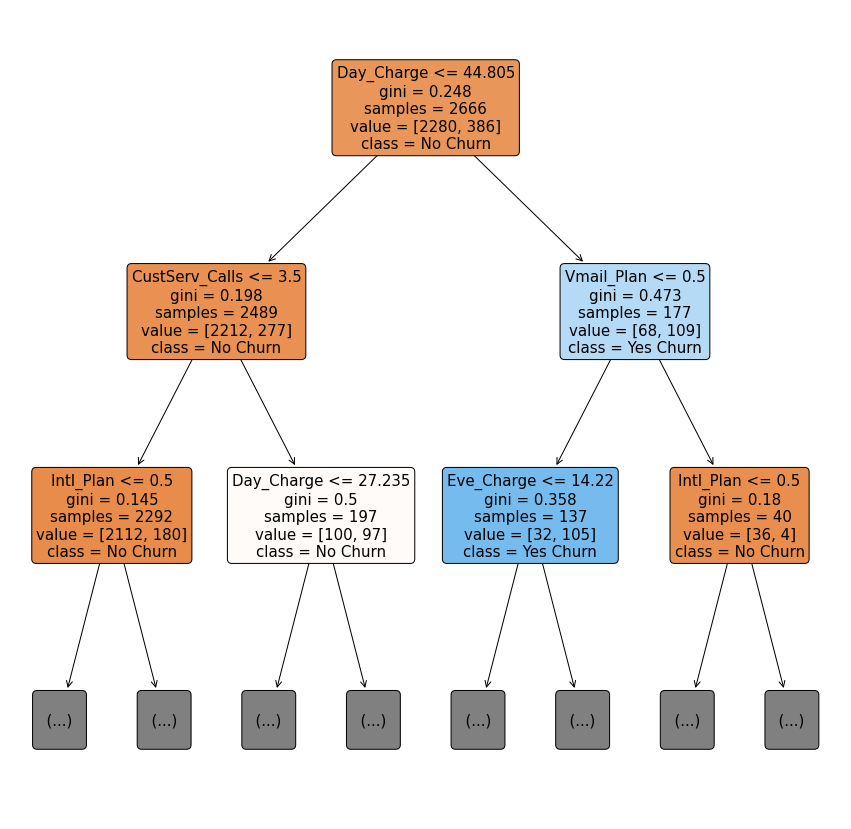

In [16]:
plt.figure(figsize = (15, 15))
plot_tree(model, 
          filled=True,
          rounded=True,
          class_names = ["No Churn", "Yes Churn"],
          feature_names = X.columns,
          max_depth=2, 
          fontsize=15)

plt.show()

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


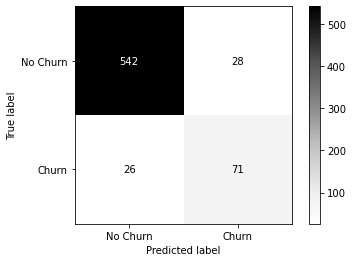

In [19]:
plot_confusion_matrix(model, 
                      X_test, 
                      y_test, 
                      display_labels=["No Churn", "Churn"],
                      cmap='Greys')
plt.show()

### 4. Perform Grid Search and Cross-Validation with Decision Tree Classifier

In [20]:
# parameters = {'criterion': ['gini','entropy'],
#               'max_depth': [3, 4, 5, 6, 7],
#               'max_features': ["auto"]}

parameters = {'criterion': ['gini','entropy'],
              'max_depth': [3, 4, 5, 6, 7]}

model = DecisionTreeClassifier(random_state=13)
# grid_search = GridSearchCV(estimator=model,
#                            param_grid=parameters,
#                            scoring="recall",
#                            cv=5,
#                            n_jobs=-1)

grid_search = GridSearchCV(estimator=model,
                           param_grid=parameters,
                           scoring="accuracy",
                           cv=5,
                           n_jobs=-1)

# grid_search = GridSearchCV(estimator=model,
#                            param_grid=parameters,
#                            scoring="precision",
#                            cv=5,
#                            n_jobs=-1)

# fit the model with the best hyper-parameters
grid_result = grid_search.fit(X_train, y_train)

In [21]:
y_pred = grid_result.predict(X_test)

Best hyperparameters in the grid search

In [22]:
grid_result.best_params_

{'criterion': 'entropy', 'max_depth': 7}

In [23]:
cv_result = pd.DataFrame(grid_result.cv_results_)
cv_result = cv_result[['param_criterion', 'param_max_depth',
                       'split0_test_score',
                       'split1_test_score', 'split2_test_score', 'split3_test_score',
                       'split4_test_score', 'mean_test_score', 'std_test_score',
                       'rank_test_score']]
cv_result = cv_result.sort_values(by='rank_test_score')
display(cv_result)
print(cv_result.columns)

,param_criterion,param_max_depth,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
9,entropy,7,0.936330,0.956848,0.943715,0.938086,0.930582,0.941112,0.008914,1
8,entropy,6,0.938202,0.958724,0.943715,0.926829,0.928705,0.939235,0.011539,2
4,gini,7,0.925094,0.943715,0.936210,0.939962,0.939962,0.936989,0.006404,3
3,gini,6,0.919476,0.956848,0.936210,0.932458,0.934334,0.935865,0.012025,4
2,gini,5,0.921348,0.953096,0.928705,0.943715,0.928705,0.935114,0.011567,5
7,entropy,5,0.928839,0.953096,0.932458,0.930582,0.923077,0.933610,0.010236,6
1,gini,4,0.904494,0.926829,0.919325,0.911820,0.902439,0.912981,0.009127,7
6,entropy,4,0.900749,0.928705,0.919325,0.911820,0.900563,0.912232,0.010862,8
0,gini,3,0.898876,0.906191,0.906191,0.908068,0.893058,0.902477,0.005666,9
5,entropy,3,0.895131,0.906191,0.906191,0.908068,0.893058,0.901728,0.006304,10


Index(['param_criterion', 'param_max_depth', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')


### 6. Show the Confusion Matrix, Classification report, and ROC-AUC

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


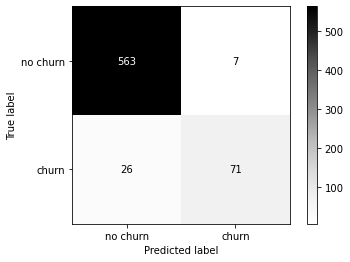

In [24]:
plot_confusion_matrix(grid_result, 
                      X_test, 
                      y_test, 
                      display_labels=["no churn", "churn"],
                      cmap='Greys')
plt.show()

### ROC

In [25]:
model = DecisionTreeClassifier()

model = model.fit(X_train, y_train)

Accuracy:  0.9505247376311844
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       570
           1       0.91      0.73      0.81        97

    accuracy                           0.95       667
   macro avg       0.93      0.86      0.89       667
weighted avg       0.95      0.95      0.95       667



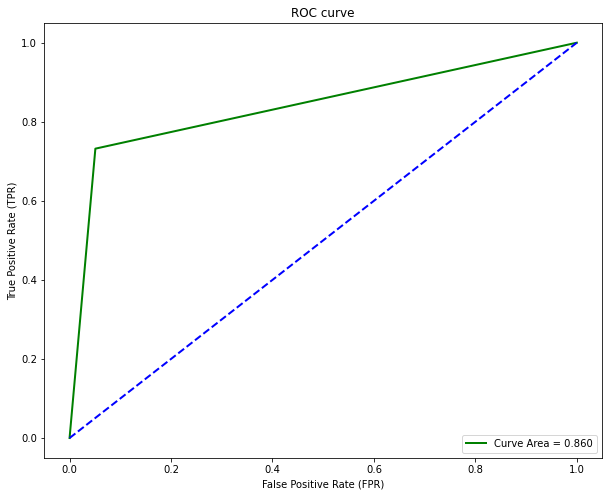

In [26]:
print('Accuracy: ', accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

fpr, tpr, thr = roc_curve(y_test, model.predict_proba(X_test)[:,1])
auc = roc_auc_score(y_test, y_pred)
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='green', lw=2, label="Curve Area = %0.3f" % auc)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()